<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/subroutine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Subroutines**

In [ ]:
!pip install cirq --quiet
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # %matplotlib inline
print(cirq.__version__)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

#### **Quantum Fourier Transform**

###### <font color="blue">**Overview**

> **Quantum Fourier Transform is the change from one basis (computational) to another (Fourier basis) - [Quantum Fourier Transform is the inverse Discrete Fourier Transform]**

https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

https://prod-edxapp.edx-cdn.org/assets/courseware/v1/8f101da9d14cfeec83df9e42a70562bf/c4x/BerkeleyX/CS-191x/asset/chap5.pdf

* Blog Post: https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

* Qiskit: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

* Cirq: https://quantumai.google/cirq/tutorials/educators/textbook_algorithms

* Youtube: https://youtu.be/rRblvBZkz7A

* IBM Youtube: https://youtu.be/mAHC1dWKNYE

* Classical Discrete Fourier Transform : https://en.m.wikipedia.org/wiki/Discrete_Fourier_transform

* https://physics.stackexchange.com/questions/219581/how-quantum-fourier-transform-equal-to-hadamard-transform-on-4-by-4-matrix

* https://physics.stackexchange.com/questions/56510/how-to-write-the-matrices-for-hadamard-gates-acting-on-differen-qubits?rq=1

* the [quantum Fourier transform](https://en.m.wikipedia.org/wiki/Quantum_Fourier_transform) (for short: QFT) is a linear transformation on quantum bits, and is the quantum analogue of the inverse discrete Fourier transform.

> The quantum Fourier transform is the classical discrete Fourier transform applied to the vector of amplitudes of a quantum state

* The quantum Fourier transform is a part of many quantum algorithms, notably Shor's algorithm for factoring and computing the discrete logarithm, the quantum phase estimation algorithm for estimating the eigenvalues of a unitary operator, and algorithms for the hidden subgroup problem. 

* The quantum Fourier transform was invented by Don Coppersmith.

* The quantum Fourier transform can be performed efficiently on a quantum computer, with a particular decomposition into a product of simpler unitary matrices. 

* However, the quantum Fourier transform acts on a quantum state, whereas the classical Fourier transform acts on a vector, so not every task that uses the classical Fourier transform can take advantage of this exponential speedup.

**Prerequisite (Update)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_046.png)

**Formula for Quantum Fourier Transform:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

So the QFT can be implemented with a series of the controlled-R gate as below:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is:

> $\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

Please note that $e^{2 \pi i}$ = 1

y ist fur die computational states, und n=4 zB ist dann 100 der computation state in binary form

y = 0 oder 1. bei 0 verschwindet der ganze term

**Quantum Fourier Transform: Compactify for Circuit Representation**

https://www.youtube.com/watch?v=mAHC1dWKNYE

**Notationshinweise:**

4 ist: 100, 3 ist 11 etc.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_048.png)

**Compactify** writing y (note on top how N in the denominator cancels out with new way of writing y)

Problem: this notation doesn't say much on how to build the quantum circuit:

> $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i x y}{N}}|y\rangle$


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

We need a bit of manipulation y:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_054.png)

https://www.youtube.com/watch?v=pq2jkfJlLmY&t=1784s

So, aus 

<font color="red"> $|\tilde{x}\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i x y}{N}}|y\rangle$ 

wird dann: 

<font color="blue"> $|\tilde{x}\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i \sum_{k=1}^{n} y^{k}}{2^k}}|y_1,y_2,..y_n\rangle$ 

bzw.:

<font color="blue"> $=\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^{n} e^{\frac{2 \pi i x y k}{2^k}}|y_1,y_2,..y_n\rangle$ 


Doing this for $y_1$ and $y_2$ etc, here you can build a circuit from (and without the fraction it looks like a Hadamard transform):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_055.png)

Now you can see it boils down to the different phases when you transform from the computational basis to the Fourier basis: (the question is only how do you apply those phases in the circuit?)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_056.png)

Here with a concrete example:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_057.png)

* $e^{\frac{2*\pi*i*5}{2}}$ ist -1 =(e^((2*pi*i*5)/2))

* (e^((2*pi*i*5)/4)) = i

* =(e^((2*pi*i*5)/8)) = -0,707106781 - 0,707106781 i

> =(e^((2*pi*i*5)/2)) gibt hierbei den Azimut an (Horizontale Phase), und (1/√ 8) die Höhe (fur Probability) ???

Going back to the 1 Qubit case with the formula above:

* =(e^((2*pi*i*1)/2)) = -1

* =(e^((2*pi*i*2)/2)) = 1

Siehe hier das Ergebnis (mit der unmodifizierten, alten Formel):

![ddd](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

**Observations before creating the QFT circuit**

First see the notation whenever there is a 1 with a phase. Please note the $2^{n-1 etc.}$ used before for each one:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_062.jpg)

*Second observation: under (2) you can see the phase state of |1111>, which you can rewrite with the product of $e^{2 \pi i[...]}$*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_063.jpg)

**So what do you need to construct a QFT circuit?**

*First a Hamadard, which you can write in the notation below, making Hadamard looking similar to QFT: (please note that one normalization is missing at the last term)*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_061.jpg)

*UROT is applying a phase (a unitary rotation)*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_064.jpg)

**Creating the QFT circuit**

*This is what you need only to create x1:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_065.jpg)

*And this series of gates gives you exactly the terms that you get here (see black arrow). The expression $\frac{x}{2^n}$ (=$\theta$ as we will see later in quantum phase estimation). All of the rotations are applying different phases on to the first qubit.*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_066.jpg)

**Komplettes Circuit**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_067.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_068.png)

###### **Quantum Fourier Transform with 1 Qubit**

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 1 Qubit:**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ 

* <font color="blue">Für x = 0 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$  = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i} 0}$  = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

* <font color="blue">Für x = 1 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = Z-Rotation aus -1

**1 Qubit QFT that does this? - Hadamard gate:**

**One qubit QFT matrix**: $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & \mathrm{e}^{\pi i}\end{array}\right)$, where $\mathrm{e}^{\pi \mathrm{i}}$ = -1. So it is: <font color="blue"> QFT für x=1 = $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & -1\end{array}\right)$

**Compare with Hadamard transform matrix:** 

In quantum computing, the Hadamard gate is a one-qubit rotation, mapping the qubitbasis states $|0\rangle$ and $|1\rangle$ to two **superposition** states with **equal weight of the computational basis** states $|0\rangle$ and $|1\rangle$. Usually the phases are chosen so that

>$
H=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\langle 0|+\frac{|0\rangle-|1\rangle}{\sqrt{2}}\langle 1|
$

in Dirac notation. This corresponds to the transformation matrix

> <font color="blue">$
H_{1}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
$

in the $|0\rangle,|1\rangle$ basis, also known as the computational basis. The states $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$ and $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ are known as $|+\rangle$ and $|-\rangle$ respectively, and together constitute the polar basis in quantum computing.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_049.png)

Follow and try movement here for 0: H Gate. For 1: X gate followed bz H gate:

* https://javafxpert.github.io/grok-bloch/

* https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_073.jpg)

https://demonstrations.wolfram.com/QuantumFourierTransformCircuit/

Reminder: QFT Formel:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

**Why Hadamard transform is exactly a 1 qubit Quantum Fourier Transform:** (see result of + for 0 state and - for 1 state)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

Siehe oben unter 'Mathermatik": Matrix-Vector-Multiplication (Single Qubit)

> <font color="blue">$H |0\rangle$</font> $ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right] =\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$ <font color="blue">$ \,\,= |+\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

> <font color="blue">$H |1\rangle$</font>$ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$ <font color="blue">$ = |-\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

$|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ weil <font color="gray">wegen $|0\rangle=\left[\begin{array}{l}1 \\ 0\end{array}\right]$ und $|1\rangle=\left[\begin{array}{l}0 \\ 1\end{array}\right]$ daher:</font> $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 + 0 \\ 0 + 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$

$|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ weil: $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 - 0 \\ 0 - 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$

2 im denominator verschwindet hier. 2^n für n=1 qubit. mit 2 oben und unten verschwinden beide.

###### **Quantum Fourier Transform with 2 Qubits**

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 2 Qubits. Results for: $x_1$ = 0 oder 1, $x_2$ = 0 oder 1**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}+\frac{x_2}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}+\frac{x_2}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_1}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls beide $\tilde{x_1}$ und $\tilde{x_2}$ aktiviert, dann ist es eine Rotation $\pi$ + $\frac{\pi}{2}$, also -i.

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_2}$ immer eine Z-Rotation im Wert von $\pi$.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_074.jpg)

*Results for 0: $x_1$ = 0, $x_2$ = 0*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}\right)}|1\rangle\right)$  = $\mathrm{e}^{2 \pi \mathrm{i} 0}$ = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}0}|1\rangle\right)$ = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

*Results for 1: $x_1$ = 0, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{4}\right)}$  = $\mathrm{e}^{\frac{\pi }{2}\mathrm{i}}$ Rotation = i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

*Results for 2: $x_1$ = 1, $x_2$ = 0*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$  = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

*Results for 3: $x_1$ = 1, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{2}{4}+\frac{1}{4}\right)}$  = $\mathrm{e}^{1,5 \pi \mathrm{i}}$ Rotation = -i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(2)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

0: ───H───@───────────
          │
1: ───────@^0.5───H───


###### **<font color="black">Quantum Fourier Transform with 3 Qubits**

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 3 Qubits. Results for: $x_1 = 1$, $x_2 = 1$, $x_3 = 1$**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{n_{x_1}}}+\frac{x_{2}}{2^{n_{x_2}}}+\frac{x_{3}}{2^{n_{x_3}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^1}+\frac{x_{2}}{2^2}+\frac{x_{3}}{2^3}\right)}|1\rangle\right)$  = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_1}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine T-Rotation im Wert von $\frac{\pi}{4}$ = zwischen 1 und i

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}+\frac{x_3}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}+\frac{x_3}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2}+\frac{x_3}{4}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls beide $\tilde{x_2}$ und $\tilde{x_3}$ aktiviert, dann ist es eine Rotation $\pi$ + $\frac{\pi}{2}$ = -i

> <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_3}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_3}$ immer eine Z-Rotation im Wert von $\pi$.


Use these to check calculations:

https://javafxpert.github.io/grok-bloch/

https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

*Formel für Quantum Fourier Transform:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

*Visualisierung eines QFT in 3 Qubits im Computational State |000>:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_050.png)

*QFT mit 3 Qubits in einem Circuit mit S- und T-Gates:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_076.jpg)

> **Wenn man im Hadamard + Status beginnt, und wendet dann ein S -Gate an, entspricht das einer Rotation 𝜋/2. Das entspricht 𝜇 und ist i. T ist entsprechend eine Rotation 𝜋/4.**

*Berechnung eines QFT in 3 Qubits im Computational State |011>:*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


Ein Z-Gate ist dann in x1, weil $\pi$\2

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)


https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

**Berechnung eines QFT in 3 Qubits im Computational State |001>:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

In die Formel oben eingegeben für ein 3 Qubit mit $x_1=0, x_2=0$ und $x_3=1$ ergibt sich folgendes in umgekehrter Reihenfolge (deswegen muss das Swap-Gate machträglich angewandt werden):

* Qubit $x_1$ (=ohne Swap-Gate wie oben $x_3$): $e^{\frac{2 * \pi * i * 1}{2^{1}}}=-1$ (Z-Gate, weil negativ Hadamard)

* Qubit $x_2$: $e^{\frac{2 * \pi * i * 1}{2^{2}}}=e^{\frac{2 * \pi * i * 1}{4}}=\mathrm{i}$ (=S-Gate)

* Qubit $x_3$ (=$x_1$ im circuit oben): $e^{\frac{2 * \pi * i * 1}{2^{3}}}=e^{\frac{2 * \pi * i * 1}{8}}=e^{\frac{\pi i}{4}}$ (=T-Gate transform)

Controlled U-ROT Gate: immer da, wo control qubit eine 1 ist, wird die entsprechende Rotation übernommen, bei 0 hingegen passiert nix.

Das stimmt überein mit der folgenden geometrischen Darstellung (*3 Qubit Quantum Fourier transformation with 001 in computational state: first state is 180 degree rotated, secind by 90 degree, third by 45 degree from Hadamard + Superposition state - Rotationen werden durch UROT gates bestimmt, und aktiviert überall do, wo control =1 ist*):


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_051.png)

Mit der neuen Formel von unten $e^{\frac{2 \pi i x}{2^n}}$ angewandt für obiges Beispiel: 001 is 1 = x in decimal, und 3 Qubits n= 1,2 und 3:

* Qubit 0: $e^{\frac{2*\pi* i*1}{2^1}}$ = -1 (korrekt siehe oben)

* Qubit 1: $e^{\frac{2*\pi* i*1}{2^2}}$ = $e^{\frac{2*\pi* i*1}{4}}$ = i (korrekt siehe oben)

* Qubit 2: $e^{\frac{2*\pi* i*1}{2^3}}$ = $e^{\frac{2*\pi* i*1}{8}}$= 

  * Müsste sein laut Bloch sphere: $e^{i * {\pi / 4}}$ bzw. $e^{i* (0,25 *\pi)}$

  * Laut Berechnung mit Formel unten: $e^{\frac{2 \pi i 1}{8}}$ = $e^{\frac{\pi i}{4}}$ = $e^{(0,25*\pi) * i}$ = korrekt!!

  * check geometrically [here](https://javafxpert.github.io/grok-bloch/) und [here](https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html)

  * Das ist übrigens das T gate (halbes s gate, was ein halbes z gate ist). siehe unten beispiel bei phase estimation.

**Unten: 5 = 101 in der Fourier Basis**

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#creating_the_circuit

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_116.png)

* The number we want to store dictates the angle at which each qubit is rotated around the Z-axis. 

* In the state $|\tilde{0}\rangle$, all qubits are in the state $|+\rangle$. 

* In the example above, to encode the state $|\tilde{5}\rangle$ (=101) on n=3 qubits, we rotated the leftmost qubit by $\frac{5}{2^{n}}=\frac{5}{8}$ full turns $\left(\frac{5}{8} \times 2 \pi\right.$ radians). 

* The next qubit is turned double this $\left(\frac{10}{8} \times 2 \pi\right.$ radians, or $\frac{10}{8}$ full turns), this angle is then doubled for the qubit after, and so on.

* **Note the frequency with which each qubit changes. The leftmost qubit (qubit 0 ) in this case has the lowest frequency, and the rightmost the highest.**

* In the Fourier basis the topmost qubit completes one full rotation when counting between 0 and $2^{t}$ .

* To count to a number, $x$ between 0 and $2^{t}$ (t = qubits), we rotate this qubit by $\frac{x}{2^{t}}$ around the z-axis. 

* For the next qubit we rotate by $\frac{2 x}{2^{t}}$, then $\frac{4 x}{2^{t}}$ for the third qubit. In this case x is not 0 or 1, but the decimal number = 5 !!!

> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{8}\right)}|1\rangle\right)$ 

> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{4}{8}+\frac{1}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{5}{8}\right)}|1\rangle\right)$= $\mathrm{e}^{1,25 * \pi \mathrm{i}}$ fur qubit 0 (roter Pfeil ist dann zwischen -1 und -i)


**Achtung**: In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ diser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ und $\mathrm{e}^{2 \pi \mathrm{i}}$ = 1 (spater wichtig fur Phase Estimation).

> x2 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{0,5 * \pi i} $ fur qubit 1




> x3 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 0}|1\rangle\right)$ = $e^{\pi i 0} = -1$ fur fur qubit 2 

**Weitere Kombinationen**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_069.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_070.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_071.png)

> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}+\frac{0}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}/2}$ = qubit 0

> x2 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $e^{\pi i} = -$ = qubit 1

> x3 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 0}|1\rangle\right)$ = $e^{\pi i 0} = 1$ = qubit 2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $e^{2* \pi i (1/4 + 1/8)}$ = $e^{0,75 \pi i}$ = qubit 0

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{2}}{2}+\frac{x_{3}}{4}\right)}|1\rangle\right)$ = $e^{1,5* \pi i}$ = $e^{i 3*\pi/2}$ =  -i = qubit 1

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi i x_3}|1\rangle\right)$ = $e^{\pi i 1}$ = -1 (Hadamard negativ) fur qubit 2

###### **<font color="black">Quantum Fourier Transform: Cirq Code Example**

https://www.mlq.ai/quantum-programming-google-cirq/

https://quantumai.google/cirq/tutorials/educators/textbook_algorithms

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

https://realpython.com/python-enumerate/

$C R_{j}=C Z^{1 / 2^{j-1}}$

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 

* $S$ entspricht $\frac{\pi}{2}$, also wenn qubit 1 = 1, dann bei qubit 0 das $S$ transform anwenden (0,5)

  * S: The square root of Z gate, equivalent to cirq.Z ** 0.5

  * See: https://quantumai.google/cirq/gates

* $T$ entspricht $\frac{\pi}{4}$

In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(3)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐
0: ───H───@────────@──────────────────────
          │        │
1: ───────@^0.5────┼─────H────@───────────
                   │          │
2: ────────────────@^0.25─────@^0.5───H───
                  └───────┘


In [ ]:
qreg = list(qubits)
qreg

[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3)]

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_076.jpg)

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@───────────────────────────────────────
          │        │           │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                   │           │      │         │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                               │                │          │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                  └───────┘   └────────────┘   └───────┘


In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(8)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────────────┐   ┌───────────────────┐   ┌──────────────────────┐   ┌──────────────────────────┐   ┌──────────────────────┐   ┌───────────────────┐   ┌───────────────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@────────────────@───────────────────@───────────────────────@──────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │        │           │                │                   │                       │                          │
1: ───────@^0.5────┼─────H─────┼──────@─────────┼───────@───────────┼──────@────────────────┼──────@───────────────────┼──────@───────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────────────────
                   │           │      │         │       │           │      │                │      │        

###### **Inverse Quantum Fourier Transform ('QFT Dagger')**

Reminder of QFT:

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$

**Remember: Dagger is a complex conjugate operation!**

QFT inverse (see -2 turning i in -i which is a complex conjugate operation):

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$ 


The operator is then (
We have already seen that the Hadamard gate is self-inverse, and the same is clearly true for the SWAP gate; the inverse of the rotations gate $R_k$ is given by):

> The matrix form of inverse QFT operator is: <font color="blue">${R^{\dagger}}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{-2 \pi i / 2^{k}}\end{array}\right)$</font> and compare with QFT operator:  <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

> So for the phase <font color="blue">$\theta$ in $e^{-2\pi i \theta}$</font>, we apply our previous phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

**Example: 1 Qubit, that was in computational state 1**, and is now in Fourier state = -1 = $\mathrm{e}^{\pi \mathrm{i}}$

* <font color="blue">$QFT$ für x = 1 $\Rightarrow$ $\tilde{x}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = -1

* <font color="blue">$QFT^{\dagger}$ für $\tilde{x}$ = -1 $\Rightarrow$ $x$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{-2 \pi \mathrm{i}\left(\frac{\tilde{x}}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{-2 \pi \mathrm{i}\left(\frac{-1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = -1 multipliziert mit $\frac{1}{\sqrt{2}}$ = -0.70710678118 (=eine Bewegung nach unten zum computational state 1 - ?? stimmt das?)

> Remember: $1 / \sqrt{2} \approx(0.71+0 i)$ (Es ist 0i weil kein Anteil i auf der Position liegt. siehe S gate und fourier transform.)

#### **Quantum Phase Estimation**

###### <font color="orange">**Overview**

> The phase estimation algorithm is used to determine the eigenvalues of a unitary operator

Computing eigenvalues has an enormous number of applications in an enormous number of fields. As such, the phase estimation algorithm is used in a large number of other quantum algorithms from solving linear systems of equations in linear algebra (search for the HHL algorithm) to minimizing the number of features required in machine learning applications (search for quantum principal component analysis).

(Eigen- hat immer was mit Stabilitat zub tun!). Es sei eine quadratische Matrix $A$ gegeben. Die Suche nach einem Vektor $v \neq 0$ und einer Zahl $\lambda$
sodass folgende Gleichung erfüllt ist, nennt man Eigenwertproblem:

>$
A \cdot v=\lambda \cdot v
$

*Man wendet eine Matrix als Transformation an einen Vektor an, und dieser Vektor wird nur verlangert und verkurzt (und bleibt gleich), aber verandert nicht seine Richtung. Z.B. die Hauptachse bei einer Rotation*.

* $A$ is the matrix representing some transformation
* Den Faktor $\lambda$  nennt man dann den zugehörigen **Eigenwert** (reell oder komplex), 
* der Vektor $v$ heißt dann **Eigenvektor** (darf nicht der Nullvektor sein). 
* Die Menge der Eigenwerte einer Matrix wird als **Spektrum** der Matrix bezeichnet.

**Matrix-Vector-Multiplication: $A \cdot v$ gives same result as just scaling the Eigenvector $\lambda \cdot v$.** 

(Calculating via determinant: The tweaked transformation squishes space into a lower dimension. Daher muss rang < n sein)!)

**Remember from Eigenvalue problem: Ax = λx in our case with the unitary operator: Ux = λx**

> $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$

> Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* Since |λ| = 1, we can write it without loss of generality as λ = $e^{2πiφ}$, where $e^{2πi}$ = 1 and 0 ≤ φ ≤ 1 is called the phase

* We saw that in QFT, φ being between 0 and 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}$

* The term “estimation” comes about not from the fact that quantum computation is probabilistic, but rather in the degree of precision that we are going to compute, or estimate, the phase to.

* The phase φ is going to be between zero and one, so we can write it as a decimal in binary notation as follows: $φ = 0.φ_1 φ_2 ···φ_n$, where each φi is either zero or one

  * The expression $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n}$ is equivalent to $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n} \Longleftrightarrow \phi=\sum_{k=1}^{n} \phi_{k} 2^{-k}$. Some numbers as binary decimals: 
  
    * <font color="blue">The number 0.5 in decimal is 0.1 in binary, since 0.1 ≡ (1) · $2^{−1}$ = 1/2 = 0.5. Note that 0.1 is the same as 0.100000....</font>

    * <font color="blue">The number 0.75 in decimal is 0.11 in binary, since 0.11 ≡ (1)·$2^{−1}$ +1·$2^{−2}$ = 1/2+1/4 = 3/4 = 0.75. So we get more precision with more qubits</font>

    * 0.111 = 0.875

    * 0.1111 = 0.9375 in decimal, because: $0 \cdot 2^{0}+1 \cdot 2^{-1}+1 \cdot 2^{-2}+1 \cdot 2^{-3}+1 \cdot 2^{-4}=0 \cdot 1+1 \cdot 0.5+1 \cdot 0.25+1 \cdot 0.125+1 \cdot 0.0625=0+0.5+0.25+0.125+0.0625=0.937510$

  * Check also what is the value of the infinitely repeating binary decimal 0.1111111...
  
  * If it needed to be proved, the above exercise proves that 0 ≤ 0.φ1φ2 · · · ≤ 1

**Warum nutzt man bei QPE den Operator $U^{2^n}$?**

* $U^{2^0}$: 1 (decimal) = 00001

* $U^{2^1}$: 2 (decimal) = 00010

* $U^{2^2}$: 4 (decimal) = 00100

* $U^{2^3}$: 8 (decimal) = 01000

* $U^{2^4}$: 16 (decimal) = 10000


**So for falls die Phase 0.111 ist, wuerde bei 3 Qubits QPE berechnen:**

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

* in this case the phase $\theta$ = 0.111


**Compare that with Quantum Fourier Transform:**

* In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ 

* Let's say all $x_1, x_2$ and $x_3$ = 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{{1}}{2}+\frac{1}{4}+\frac{1}{8}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i}(0.5+0.25+0.125)}$ and in binary form: <font color="red">$\mathrm{e}^{2 \pi \mathrm{i}(0.100+0.010+0.001)}$</font>

* **We see that in QFT and QPE it's the same (both in red)!**

Jedes $U^{2^n}$ wird immer dann aktiviert, wenn im Control-Qubit oben eine 1 gemessen wird (siehe Bild hier unten):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_118.png)

**QPE in Steps:** [Source](https://www.ryanlarose.com/uploads/1/1/5/8/115879647/quic03-phase-estimation.pdf)

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_117.png)


* We let U be a unitary operator and |ψ⟩ an eigenstate* (Eigenvector, Hadamard (+) is an Eigenstate) with eigenvalue $λ = e^{2πi0.φ_1}$

1. We first perform a Hadamard gate on the first qubit to get the state 

  * Original state of both qubits: $|0\rangle \otimes|\psi\rangle$
  
  * Hadamard on first qubit: $|+\rangle \otimes|\psi\rangle$ =
  
  * <font color="red">Distribute superposition: $|0\rangle|\psi\rangle+|1\rangle|\psi\rangle$</font>

  * <font color="blue">this part above is the rule from tensor products: If the state of the first particle is a superposition of two states, the state of the two-particle system is also a superposition: $\left(v_{1}+v_{2}\right) \otimes w=v_{1} \otimes w+v_{2} \otimes w$
</font>

  * we have intentionally omitted the normalization factor of 1/√2 for clarity

2. We then perform a controlled U operation, which we have written as $U^{2^0}$

  * $|0\rangle|\psi\rangle+|1\rangle$ <font color="red">$U$</font> $|\psi\rangle$ =

  * $|0\rangle|\psi\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle|\psi\rangle$ =

  * $|0\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle) \otimes|\psi\rangle$

* Here are 2 things very important: 
  
    * The second qubit register containing |ψ⟩ hasn’t changed. We shouldn’t expect it to, **since |ψ⟩ is an eigenstate of U. Thus, no matter how many times we apply U to this register, nothing happens to |ψ⟩**. But if we apply it more often it will 'amplify' the phase (Not in the sense of amplitude amplification)
    
    * what’s the point of applying U then? The effect was that **it wrote some information about the eigenvalue into the relative phase of the first qubit**. Namely, the entire effect was to
map: $|0\rangle+|1\rangle \mapsto|0\rangle+e^{2 \pi i 0. \phi_{1}}|1\rangle$

3. How can we read out this information from the quantum state? Consider the effect of applying another Hadamard transformation on the first qubit (without another H we will always measure 50/50 % a 0 or 1), which will produce (ignoring the normalization factor of 1/2): 

  * $H(|0\rangle+$ <font color="red">$e^{2 \pi i 0 \cdot \phi_{1}}$</font> $|1\rangle)=$ $(1+$<font color="red">$e^{2 \pi i 0. \phi_{1}}$</font>$)|0\rangle$ + $(1-$<font color="red">$e^{2 \pi i 0 . \phi_{1}}$</font>$)|1\rangle$

  * for more than 1 Qubit we use on Quantum Phase Estimation $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ then the inverse Quantum Fourier transform:  <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font> so that: $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font>

  * inverse QFT for 1 Qubit is: $ \frac{1}{2^{\frac{1}{2}}} \sum_{x=0}^{2^{1}-1} e^{\frac{-2 \pi i k x}{2^{1}}}|x\rangle$ = $\frac{1}{\sqrt{2}} e^{-1 \pi i k x}$ fur $k$ = $\varphi$ = 0 and $x$ = 0. --> somehting is not right here yet!

Thus, we measure with certainty (i.e., not probabilistically) a state that tells us exactly what the phase,
and hence the eigenvalue, is.

*Why are we starting with an eigenstate? Doesn’t this defeat the whole purpose? After all, we could just do U|ψ⟩ and see what it’s effect was. Answer: here, we’re just using the eigenstate for pedagogical purposes. As we’ll see, the general phase estimation algorithm does not require this.

Remember in **Quantum Fourier Transform**: 


> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ 

* <font color="blue">$e^{2\pi i}$ = 1</font>

* In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (<font color="red">=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩</font>)

* Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

* A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**Now in Phase Estimation**: 

> In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ 

Quantum phase estimation addresses the following problem:
* We have a $n$-qubit oracle function $U$, encoded in the form of a controlled- $U$ unitary.
* **$U$ has an eigenvalue $e^{2 \pi i \phi}$, associated with an eigenvector $|u\rangle$ which we can prepare.**
* <font color="red">**We wish to estimate the phase, $\phi$, of the eigenvalue to $t$ bits of precision.**

*Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle .$*

* Here $|\psi\rangle$ is an eigenvector and $e^{2 \pi i \theta}$ is the corresponding eigenvalue. 

* <font color="red">For example: the eigenvalues of X are −1 and 1 and have the eigenvectors |−⟩ and |+⟩ respectively.*</font>

*Since $U$ is unitary, all of its eigenvalues have a norm of 1.*

**Exkurs**:

* und $\mathrm{e}^{2 \pi \mathrm{i}}$ = 1 

* weil $\mathrm{e}^{\pi \mathrm{i}}$ = -1

* und: 1 + $\mathrm{e}^{\pi \mathrm{i}}$ = 0, Spezialfall der [Eulerschen Formel](https://3.141592653589793238462643383279502884197169399375105820974944592.eu/e-hoch-ipi-und-die-eulersche-identitaet/): $e^{i x}=\cos (x)+i \sin (x)$

*Die Eulersche Formel / Identität lässt sich sehr anschaulich mit Hilfe von Taylor-Reihen erklären und beweisen. Setzt man x=π in die Eulersche Formel ein, so bleibt wegen cos(π)=-1 und sin(π)=0 genau das gewünschte Resultat übrig.*

**Quantum Phase Estimation**

* algorithm for determining the eigenvalues of a unitary operator

* the [quantum phase estimation algorithm](https://en.m.wikipedia.org/wiki/Quantum_phase_estimation_algorithm) (also referred to as quantum eigenvalue estimation algorithm), is a quantum algorithm to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

* More precisely, given a unitary matrix $U$ and a quantum state $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$, the algorithm estimates the value of $\theta$ with high probability within additive error $\varepsilon$, using $O(\log (1 / \varepsilon))$ qubits (without counting the ones used to encode the eigenvector state) and $O(1 / \varepsilon)$ controlled- $U$ operations. 

* The algorithm was initially introduced by Alexei Kitaev in 1995.

* Phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm and the quantum algorithm for linear systems of equations.

Remember from phase shift R-gates (Pauli Z, S, T, etc):

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{\varphi i}\end{array}\right]$

here 𝜑 (phi) is the phase shift (azimuth) with the period 2𝜋, so:

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2𝜋i}\end{array}\right]$

$\theta$ (theta) is then the other component to determine position on Bloch sphere. So that it becomes:

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2 \pi i \theta}\end{array}\right]$

phi: $\phi$ bzw. $\varphi$ is azimuth = phase

https://quantum-computing.ibm.com/composer/docs/iqx/guide/quantum-phase-estimation

**Zusammenhang QFT & QPE:**

Für Qubit 2 ausführliche Erläuterung, warum es dem T Gate entspricht:

> $
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Quantum Phase Estimation will give us $\theta$ where:

> $
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find für x=1 und n=3 in der QFT formel $e^{\frac{2 \pi i 1}{8}}$):

> $
\theta=\frac{1}{8}
$

Diesen Wert sieht man oben in Qubit 2 !!

> $\theta = \frac{x}{2^n}$

fur x= 0 or 1 in a given qubit, and n=number of qubits

für: $e^{2 i \pi \theta}|1\rangle$

**Example: T-Gate**

Let's take a gate we know well, the $T$-gate, and use Quantum Phase Estimation to estimate its phase. You will remember that the $T$-gate adds a phase of $e^{\frac{i \pi}{4}}$ to the state $|1\rangle$ :

$
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Since QPE will give us $\theta$ where:

$
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find:

$
\theta=\frac{1}{8}
$

Proof:

* $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2 \pi i \theta}\end{array}\right]$

* $e^{2 \pi i \theta}$ with $\theta=\frac{1}{8}$

* $e^{2 \pi i \frac{1}{8}}$

* $e^{\frac{\pi i}{4}}$ = $T|1\rangle$

###### **<font color="black">Understand Connection between Phase & Measurement Probability**

https://javafxpert.github.io/grok-bloch/

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

See how you can change the outcome if you change the phase:

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.Z(a), # Change phase of qubit
     cirq.T(a), # Change phase of qubit a bit more
     # Phase is now: 1*π for Z + 0,25*π for T = 1,25*π
     cirq.H(a), # without the second H, the probability is always around 50/50 after measurement !!
     cirq.measure(a)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───T───H───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a=111111010111111111111110111101111111111101110101111111011111101111101111111110011101101111101111111111111111111101111011110111111111110010111101111111111111101111111111111010111111111111111110110100111111111111101111111111111111101111011111011111111111110111111101111101111111001011101111111111111110101111111111111111111101110111111011111111011110101111110110111111111111111111111111111111111110111111001111111111110111111111111011111101111111111111111110110111101101011111111110101010111110111111011111111111111111111111110111011111011110111101111111011111011111111100111111111000111111111011101111101111101111011111101111111111111111111101111111111011111111110011101111111011111111111111111101100101011111111100111111111111111001111111010011001111111111111111111111111101111111111110111111111111011110110011111111111111111111101111010111100111111101111111111111111111111111111011111111111111111111111111111111111111111111001011111111111111111101111111111111111111101110101111

Without the additional T-operation, the result would be 100% = 1

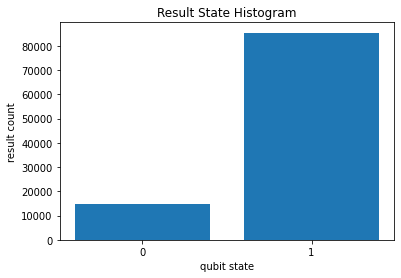

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

> **<font color="red">We can reverse-engineer / extract the phase just from looking at the probability measures at end = Quantum Phase Estimation**

In [ ]:
result.histogram(key="a")

Counter({0: 14573, 1: 85427})

Result is around 0.14742. 

###### **<font color="black">Step by Step Explanation**

https://jonathan-hui.medium.com/qc-phase-estimation-in-shors-algorithm-acef265ebe50

https://www.youtube.com/watch?v=5kcoaanYyZw

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_084.png)

>**See below: Remember that a unitary matrix has eigenvalues of the form $e^{i \theta_{\psi}}$ (ohne $2 \pi$ wie oben bei QFT) and that it has eigenvectors that form an orthonormal basis**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_083.png)

The problem: in both cases the probability is 0,5, just differs by the phase added:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_078.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_079.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_080.png)

**The probability of measuring 0 and 1 is each 0,5, but there is a small factor that makes them differ from 0,5, depending on the phase (angle):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

Beachte: One complete turn (360°) is equal to 2π radians, so 180° is equal to π radians, or equivalently, the degree is a mathematical constant: **1° = π⁄180**.
https://en.wikipedia.org/wiki/Degree_(angle)

![ggg](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Degree_diagram.svg/440px-Degree_diagram.svg.png)

> **In the different between the probability of measuring 0 or 1, you've encoded that phase! (In other words: you've taken that phase information and turned it into and amplitude that you can measure.**

**How to do this experimentally: you do a million shots of the experiment, collect statistics and check what the statistics say. How many times did I get zero? How many times did I get one? The hope is that the difference between the statistics of zero and one would allow us to back out theta**.

**Next level: now getting more precision with more qubits:** (there is another circuit to prepare Psi yet, which is assumed to be given here)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_082.png)

writing out the calculation:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_085.png)

**Comparing QPE with QFT (QPE is the same as QFT with a different phase):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_086.png)

It's like applying a QFT of something (of a special phase $\frac{\theta_{\psi}}{2^{n}} 2 \pi$, the green box above!), and in order to get back to the original state you need to apply an inverse QFT at the end:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_087.png)

###### **<font color="black">Cirq Example**

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#creating_the_circuit

https://arxiv.org/pdf/1910.11696.pdf

![gg](https://upload.wikimedia.org/wikipedia/commons/a/a5/PhaseCircuit-crop.svg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_115.png)

$U$ = $Z^{2^{n-n}}$ 

Z = $e^{\pi}$ 

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 


then:

> <font color="blue">$U$ = $e^{\pi * 2^{n-n}}$


https://www.youtube.com/watch?v=YpcT8u2a2jc&list=PLOFEBzvs-VvrXTMy5Y2IqmSaUjfnhvBHR

In [ ]:
"""Set up the unitary and number of bits to use in phase estimation."""
# Value of θ which appears in the definition of the unitary U above.
# Try different values.
theta = 0.234

# Define the unitary U.
U = cirq.Z ** (2 * theta)

# Accuracy of the estimate for theta. Try different values.
n_bits = 3

Now we can build the first part of the circuit (up until the inverse QFT) for phase estimation.



In [ ]:
"""Build the first part of the circuit for phase estimation."""
# Get qubits for the phase estimation circuit.
qubits = cirq.LineQubit.range(n_bits)
u_bit = cirq.NamedQubit('u')

# Build the first part of the phase estimation circuit.
phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

for i, bit in enumerate(qubits):
    phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - i - 1)))
    # explanation: U-rot control aktiviert wenn entsprechendes qubit in state 1
    # dann aktiviere formel: U^2^(n-1) ...U^2^(n-2) ...U^2^(n-n)

print(phase_estimator)

0: ───H───@──────────────────────────────
          │
1: ───H───┼──────────@───────────────────
          │          │
2: ───H───┼──────────┼─────────@─────────
          │          │         │
u: ───────Z^-0.128───Z^0.936───Z^0.468───


> <font color="blue">$U$ = $Z^{2^{n-n}}$ = $e^{\pi * 2^{n-n}}$ fur das erste Gate: = $e^{\pi * (-0.128)}$ ????


**The controlled u gate**:

$0\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**. 
Sometimes this is shortened to just CX, CY and CZ.

The next step is to perform the inverse QFT on the estimation qubits and measure them.



In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

In [ ]:
"""Build the last part of the circuit (inverse QFT) for phase estimation."""
# Do the inverse QFT.
phase_estimator.append(make_qft_inverse(qubits[::-1]))

# Add measurements to the end of the circuit
phase_estimator.append(cirq.measure(*qubits, key='m'))
print(phase_estimator)

                                         ┌────────┐
0: ───H───@──────────H─────────@──────────@────────────────────────M('m')───
          │                    │          │                        │
1: ───H───┼──────────@─────────@^-0.5─────┼──────H────@────────────M────────
          │          │                    │           │            │
2: ───H───┼──────────┼─────────@──────────@^-0.25─────@^-0.5───H───M────────
          │          │         │
u: ───────Z^-0.128───Z^0.936───Z^0.468──────────────────────────────────────
                                         └────────┘


The initial state for u_bit is the  state, but the phase for this state is trivial with the operator we chose. Inserting a Pauli  operator at the begining of the circuit changes this to the  state, which has the nontrivial  phase.

In [ ]:
"""Set the input state of the eigenvalue register."""
# Add gate to change initial state to |1>.
phase_estimator.insert(0, cirq.X(u_bit))

print(phase_estimator)

                                         ┌────────┐
0: ───H───@──────────H─────────@──────────@────────────────────────M('m')───
          │                    │          │                        │
1: ───H───┼──────────@─────────@^-0.5─────┼──────H────@────────────M────────
          │          │                    │           │            │
2: ───H───┼──────────┼─────────@──────────@^-0.25─────@^-0.5───H───M────────
          │          │         │
u: ───X───Z^-0.128───Z^0.936───Z^0.468──────────────────────────────────────
                                         └────────┘


In [ ]:
"""Simulate the circuit and convert from measured bit values to estimated θ values."""
# Simulate the circuit.
sim = cirq.Simulator()
result = sim.run(phase_estimator, repetitions=10)

# Convert from output bitstrings to estimate θ values.
theta_estimates = np.sum(2 ** np.arange(n_bits) * result.measurements['m'], axis=1) / 2**n_bits
print(theta_estimates)

[0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.125]


**Here is a solution that just consists of what we did in previous cells all put together.**

In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

In [ ]:
print(theta_estimates)

[0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.125]


In [ ]:
print(estimates)

[0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.16015625, 0.123046875, 0.123046875, 0.12353515625, 0.121337890625, 0.1234130859375, 0.12347412109375, 0.123443603515625]


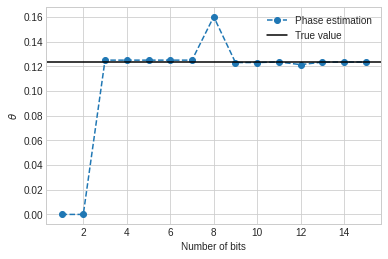

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");

#### **Shor's Algorithm**

##### **<font color="black">Classical Calculation**

> <font color="blue">Factoring is equivalent to finding a nontrivial squareroot of 1 mod N.

> all we need to do is find this nontrivial squareroot of unity, and we can factor whatever number we need. As promised, we can do this with period finding, specifically by computing the order of a random integer

> The order of some integer x modulo N is the smallest integer r such that $x^r$ = 1 mod N

**<font color="black">Modular Arithmetic**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_088.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_089.jpg)

**<font color="blue">Step 1: Pick coprime of N**

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=5 * 3

# Pick coprime (!) number to N to factorize N into primes
a=13

**Code Example to understand periodicity in the context of factoring prime numbers:**

In [ ]:
import math
# Compute greated common divisor between a and N
math.gcd(a, N)

1

*Drei mögliche Verfahren zur Berechnung des ggT :*

Erstes Verfahren: Euklidischer Algorithmus 
* 15	:	13	  = 	1	  Rest  	2.	  Also ist ggT (15,13)= ggT (13,2)
* 13	:	2	  = 	6	  Rest  	1.	  Also ist ggT (13,2)= ggT (2,1)
* 2	:	1	  = 	2	  Rest  	0.	  Also ist ggT (2,1)= ggT (1,0)
* Ergebnis: Der ggT von 15 und 13 ist 1.

Zweites Verfahren: Vergleichen der Teilermengen .
* Die Teilermenge von 15 lautet: {1,3,5,15}.
* Die Teilermenge von 13 lautet: {1,13}.
* Die größte in beiden Teilermengen vorkommende Zahl ist 1. Also ist 1 der ggT von 15 und 13. 

Dritte Möglichkeit: Vergleichen der Primfaktorzerlegung
* Die Primfaktorzerlegung von 15 lautet: 15= 3·5.
* Die Primfaktorzerlegung von 13 lautet: 13= 13.
* Die gemeinsamen Primfaktoren sind: 1.
* Also ist 1 der ggT.

*Modulo (kurz: mod) berechnet den Rest einer Division zweier Zahlen. In Mathematischen Formeln wird modulo mit mod abgekürzt, beispielsweise: 23 mod 8 = 7. Bei dieser Rechnung kommt 7 heraus, weil die 8 zweimal in die 23 passt und dann 7 übrig bleiben.*

**<font color="blue">Step 2: Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

* <font color="blue">the order of x is just the period of the function f(i) = $x^i$ mod N. 

* <font color="blue">In quantum computing you use QFT in order to determine the period !!

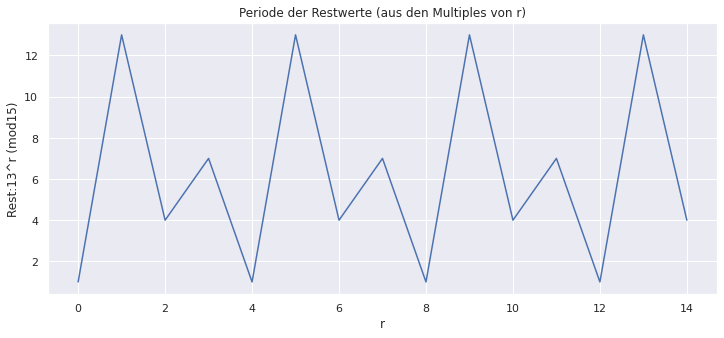

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

<font color="red">**Beispiel: Choose any number $a$ and takes its multiple $r$ so many times, until the rest in modulo is 1, (except r=0)**</font>

> $13^0$ (mod 15) = 1 (mod 15) = 1

> $13^1$ (mod 15) = 13 

> $13^2$ (mod 15) = 169 (mod 15) = 4

* <font color="blue">*Erlauterung: Nimm 15 * 11 = 165, bis zur 169 verbleibt ein Rest 4*

> $13^3$ (mod 15) = 2197 (mod 15) = 7 

* <font color="blue">*Erlauterung: Nimm 15 * 146 = 2190, bis zur 2197 verbleibt ein Rest 7*

> $13^4$ (mod 15) = 28561 (mod 15) = 1 (<font color="blue"><u>hier started die Periode wieder, that's the r we are looking for!</u>)

> usw..

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 4


**<font color="blue">Step 3: Bestimme $x \equiv a^{\frac{r}{2}}(\operatorname{mod} N)$**. Mindestens einer der beiden Primfaktoren von N={p,q} is beinhalted in gcd(x+1, N) bzw. gcd(x-1, N)

*In this case with a=13, N=15 and r=4:*

* $x \equiv a^{\frac{r}{2}}(\operatorname{mod} N)$

* $x \equiv 13^{\frac{4}{2}}(\operatorname{mod} 15)$

* x = 169 (mod 15) = 4

  * gcd(x-1, N) = 3 = p

  * gcd(x+1, N) = 5 = q

In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 4.0
5 3


Achtung: im nachsten Beispiel: N=11*7 (Primzahlen), a=18, ergibt x=43. 

* Davon x-1=42 und x+1=44. 
* Das sind naturlich keine Primzahlen, 
* Aber deren Faktoren sind: 44 = 2 * 2 * 11 und 42 = 2 * 3 * 7
* das heisst, x-1 und x+1 kann auch die Primzahlen indirekt enthalten!

**<font color="blue">Classical: Rechnung 2**

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=11 * 7 

# Pick coprime (!) number to N to factorize N into primes
a=18

In [ ]:
import math
# Compute greated common divisor between a and N
math.gcd(a, N)

1

*Drei mögliche Verfahren zur Berechnung des ggT :*

Erstes Verfahren: Euklidischer Algorithmus 

* 77	:	18	  = 	4	  Rest  	5.	  Also ist ggT (77,18)= ggT (18,5)
* 18	:	5	  = 	3	  Rest  	3.	  Also ist ggT (18,5)= ggT (5,3)
* 5	:	3	  = 	1	  Rest  	2.	  Also ist ggT (5,3)= ggT (3,2)
* 3	:	2	  = 	1	  Rest  	1.	  Also ist ggT (3,2)= ggT (2,1)
* 2	:	1	  = 	2	  Rest  	0.	  Also ist ggT (2,1)= ggT (1,0)
* Ergebnis: Der ggT von 77 und 18 ist 1.

Zweites Verfahren: Vergleichen der Teilermengen .

* Die Teilermenge von 77 lautet: {1,7,11,77}.
* Die Teilermenge von 18 lautet: {1,2,3,6,9,18}.
* Die größte in beiden Teilermengen vorkommende Zahl ist 1. 
* Also ist 1 der ggT von 77 und 18. 

Dritte Möglichkeit: Vergleichen der Primfaktorzerlegung

* Die Primfaktorzerlegung von 77 lautet: 77= 7·11.
* Die Primfaktorzerlegung von 18 lautet: 18= 2·3·3.
* Die gemeinsamen Primfaktoren sind: 1.
* Also ist 1 der ggT.

*Modulo (kurz: mod) berechnet den Rest einer Division zweier Zahlen. In Mathematischen Formeln wird modulo mit mod abgekürzt, beispielsweise: 23 mod 8 = 7. Bei dieser Rechnung kommt 7 heraus, weil die 8 zweimal in die 23 passt und dann 7 übrig bleiben.*

**<font color="blue">Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

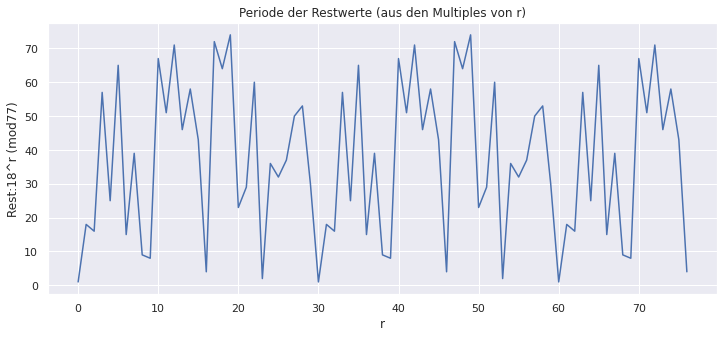

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

*Beispiel: Choose any number $a$ and takes its multiple $r$ so many times, until the rest in modulo is 1, (except r=0)*

> $13^0$ (mod 15) = 1 (mod 15) = 1

> $13^1$ (mod 15) = 13 

> $13^2$ (mod 15) = 169 (mod 15) = 4

* <font color="blue">*Erlauterung: Nimm 15 * 11 = 165, bis zur 169 verbleibt ein Rest 4*

> $13^3$ (mod 15) = 2197 (mod 15) = 7 

* <font color="blue">*Erlauterung: Nimm 15 * 146 = 2190, bis zur 2197 verbleibt ein Rest 7*

> $13^4$ (mod 15) = 28561 (mod 15) = 1 (<font color="blue"><u>hier started die Periode wieder, that's the r we are looking for!</u>)

> usw..

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 30


In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 43.0
11 7


**<font color="blue">Classical: Rechnung 3**

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=119 # 7 * 17

# Pick coprime (!) number to N to factorize N into primes
a=16

In [ ]:
import math
# Compute greated common divisor between a and N
math.gcd(a, N)

1

**<font color="blue">Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

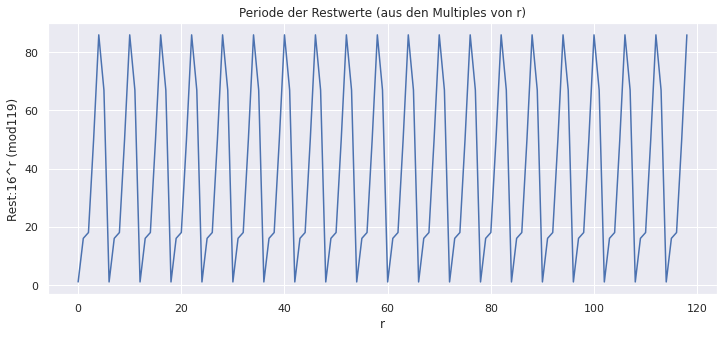

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 6


The order of 16 mod 119 is 6. Now, we compute $16^3$ ≡ 50. 

Gcd(49,119) = 7, so 7 is a factor of 119, and gcd(51, 119) = 17 which is another factor of 119.

In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 50.0
17 7


**<font color="blue">Classical: More Rechnungen**

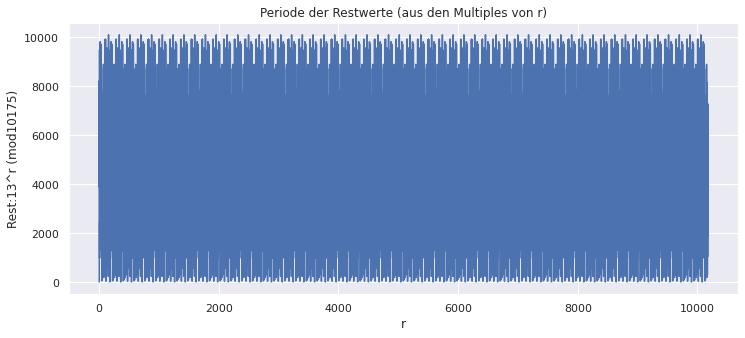

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=37 * 275

# Pick coprime (!) number to N to factorize N into primes
a=13

import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

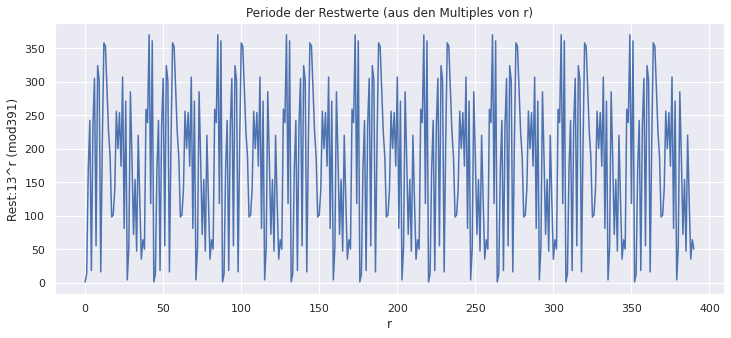

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=7 * 23

# Pick coprime (!) number to N to factorize N into primes
a=3

import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 180


In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 139.0
7 23


##### **Overview**

* When finding order using the period finding algorithm, it is important to use enough qubits. A sensible rule is that you need to use m qubits so that $2^m$ >> $N^2$, where N is the number we are trying to factor, because the order of a random number might be as large as N

* Example: Lets factor N=119. Suppose we pick the number 16 to start with. Wie viele Qubits m sollten wir mindestens nehmen? $N^2$ = $119^2$ =14.161 und $2^m$ muss deutlich grosser sein, also mindestens = $2^{14}$ = 16.384. Wir brauchen also mindestens 14 Qubits, um 119 zu faktorisieren.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_090.jpg)

* Because we know that the order of x will be even and $x^{s/2}$ will be a nontrivial square root with probability at least 1/2, we can be confident that we will be able to factor N in just a few runs of the algorithm. Because the time it takes to find the period grows as a polynomial in the number of bits, and the number of bits grows like 2logN(by the above requirement), we expect the time it takes to factor N to grow as a polynomial in logN.

* Here is the circuit for Shor’s Algorithm. It relies heavily on period finding, and so the circuit looks a lot like the circuit for period finding. The key difference is that we are finding the period of f(i) = xi, and the number of bits we need to input is very large.

**Example**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_091.jpg)

**How does it work in the quantum circuit?**

That's the function in $U$: given an $x$, the $U$ will compute:

> $f_{a, N}(x) \equiv a^{x}(\bmod N)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_092.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_093.png)

**<font color="blue">Shor's Algorithm: Step by Step**

**Beispiel: a=13 und N=15, was macht Shor's Algorithm genau im Circuit an der Stelle $U_{f_{(a,N)}}$ und $QFT^{\dagger}$?**

ps: a muss ein Coprime von N sein. Wenn es kein Coprime ist, muessen wir nicht durch Shor's Algorithm gehen, weil a dann einen Faktor mit N teilt :) Aber es ist very unlikely to find a coprime of a large number N.

**First let's divide it into steps. 1-5:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_095.png)

##### <font color="blue">**Step 0 and 1: Get Qubits in state 0 and apply Hadamard Superposition**

**Step 0**: we start with 4 Qubits all in zeros, mit den Registers x und w, und jedes 4 Mal Tensorproduct multipliziert, weil wir 4 Qubits haben: 

> $|0\rangle_{x}^{\otimes 4}$ $|0\rangle_{w}^{\otimes 4}$

**Step 1**: All Hamadard Gates are applied to top 4 Qubits (x register), and right part (w register) gets nothing applied to it:

> $[H^{\otimes 4}|0\rangle] \,\, |0\rangle^{\otimes^{4}}$

> = $\frac{1}{4}[|0\rangle+|1\rangle+|2\rangle+\cdots+|15\rangle]$ $|0\rangle$

* Reminder 1: Multiplikation mit $\frac{1}{4}$, weil 4 Qubits in Hadamard-Superposition

* Reminder 2: this is the 4 bit representation of the decimal number, so for example 15 in binary = 1111. Daher kann man auch die 4 angeben als Erinnerung der Bit representation:

> = $\frac{1}{4}[|0\rangle_4+|1\rangle_4+|2\rangle_4+\cdots+|15\rangle_4]$ $|0\rangle_4$


##### <font color="blue">**Step 2: Compute $U$ with $f_{a, N}(x) \equiv a^{x}(\bmod N)$**

**Step 2**: Was passiert genau in der Box mit $U_{f_{(a,N)}}$?

**Given an $x$, the $U$ will compute: <font color="red">$f_{a, N}(x) \equiv a^{x}(\bmod N)$</font>**

Schauen wir nochmal im vorherigen Schritt und markieren eine Komponente:

> = $\frac{1}{4}[$ <font color="red">$|0\rangle_4$</font> $+|1\rangle_4+|2\rangle_4+\cdots+|15\rangle_4]$ $\,$ $|0\rangle_4$

<font color="red">$U_{f_{(a,N)}}$</font> macht dann folgendes:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\, \left|  0 \bigoplus 13^{0}(\bmod 15)\right\rangle_{4}$</font> + $|1\rangle_{4}\left|0 \bigoplus 13^{1}(\bmod 15)\right\rangle_{4}$ + $|2\rangle_{4}\left|0 \bigoplus 13^{2}(\bmod 15)\right\rangle_{4}$ + $|3\rangle_{4}\left|0 \bigoplus 13^{3}(\bmod 15)\right\rangle_{4}$ etc..]

Remember: $\bigoplus$ means "addition modular 2" bzw. "XOR". Anything XORs with 0, is thing itself: 0 $\bigoplus$ Z = Z. damit ergibt sich folgende Rechnung:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\, \left|   13^{0}(\bmod 15)\right\rangle_{4}$</font> + $|1\rangle_{4}\left| 13^{1}(\bmod 15)\right\rangle_{4}$ + $|2\rangle_{4}\left| 13^{2}(\bmod 15)\right\rangle_{4}$ + $|3\rangle_{4}\left| 13^{3}(\bmod 15)\right\rangle_{4}$ etc..]


Aus der Modulo-Rechnung ergeben sich die Restwerte:

* <font color="red">$13^{0}(\bmod 15)$ = 1</font>

* $13^{1}(\bmod 15)$ = 13

* $13^{2}(\bmod 15)$ = 4

* $13^{3}(\bmod 15)$ = 7

* $13^{4}(\bmod 15)$ = 1

* usw..

Since it's periodic, it will repeat, with the x and w register:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\,\left|1\right\rangle_{4}$</font> + $|1\rangle_{4}\left|13\right\rangle_{4}$ + $|2\rangle_{4}\left|4\right\rangle_{4}$ + $|3\rangle_{4}\left|7\right\rangle_{4}$ etc..]

Hier nochmal untereinander mit denselben Restwerten zur besseren Visualisierung:


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_094.png)

##### <font color="blue">**Step 3: Measurement of the w register / bottom 4 Qubits**

**Step 3**: Measurement of the w register / bottom 4 Qubits:

* the outputs of the w-register measurements are either 1, 13, 4 or 7 (die Restwerte) with equal probability

* let's say we measure 7, what happens to x? X becomes either 3, 7, 11 or 15 (the value in front of the qubit with 7!) with equal probability:

  * after $|\omega\rangle$ = $|7\rangle_4$ , $|x\rangle$ becomes:

  * <font color="blue">$|x\rangle$ $|\omega\rangle$ = $\frac{1}{2}\left[|3\rangle_{4}+|7\rangle_{4}+|11\rangle_{4}+ |15 \rangle_{4}\right]$ $\otimes |7\rangle_4$

  * Normalization has changed: before we had 16 combinations mit 1/4, here we have only 4 combinations with 1/2 (=one over square root of 4)

* **For the next step 4, the Restwert doesn't matter anymore, here: $\otimes |7\rangle_4$. We can ignore it. Because it step 4 we apply the measured $|x\rangle$ in the $QFT^{\dagger}$, and don't care about $|\omega\rangle$ anymore**. And $|x\rangle$ is in this case: $\frac{1}{2}\left[|3\rangle_{4}+|7\rangle_{4}+|11\rangle_{4}+ |15 \rangle_{4}\right]$


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_095.png)

##### <font color="blue">**Step 4: Apply inverse QFT**

**Step 4**: Apply $QFT^{\dagger}$ on the $|x\rangle$ register

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$ (Reminder!)

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$ (see -2 turning i in -i which is a complex conjugate operation)

* We want to know what QFT dagger is doing to (it is $\frac{1}{\sqrt{16}}$ because we have 4 Qubits)

  * $QFT^{\dagger}|3\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 3 y}{16}}|y\rangle$

  * $QFT^{\dagger}|7\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 7 y}{16}}|y\rangle$

  * $QFT^{\dagger}|11\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 11 y}{16}}|y\rangle$

  * $QFT^{\dagger}|15\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 15 y}{16}}|y\rangle$

Alltogether:

  * $QFT^{\dagger}|x\rangle$ = $\frac{1}{{8}} \sum_{y=0}^{15}$ [ $e^{-i\frac{ 3 \pi}{8}y}$ + $e^{-i\frac{ 7 \pi}{8}y}$ + $e^{-i\frac{ 11 \pi}{8}y}$ + $e^{-i\frac{ 15 \pi}{8}y}$] $|y\rangle$

    * with: $e^{-i\frac{ 3 \pi}{8}y}$ = $\cos \left(\frac{3 \pi}{8} y\right)-i \sin \left(\frac{3 \pi}{8} y\right)$ (und aquivalent fur alle anderen drei)

    * siehe coding rechnung unten was genau passiert hier!
  
  * <font color="blue">$QFT^{\dagger}|x\rangle$ = $\frac{1}{{8}}$ [ $4|0\rangle_4$ + $4i|4\rangle_4$ $-4|8\rangle_4$ $-4i|12\rangle_4$ ]</font>
  
  * Remember we had a sum before: $\frac{1}{{8}} \sum_{y=0}^{15}$. And notice how all the other terms now vanished to zero, because you had equal contributions of plus and minus.

    * **This is exactly what it means when people tell you that quantum computers take advantage of interference!! = when a lot of the terms vanish, and the answer only converges to the terms that we care about.**

    * here is the calculation what happened, you see many zeros:

<font color="red">Hier Beispielrechnung fur y=1, um vanishing components zu verstehen</font>. Unten im Code die Ergebnisse, zum Beispiel fur y=1 als Ergebnis = 0, $QFT^{\dagger}|x\rangle$ fur y = 1: 
    
  * $e^{-i\frac{ 3 \pi}{8}y}$ + $e^{-i\frac{ 7 \pi}{8}y}$ + $e^{-i\frac{ 11 \pi}{8}y}$ + $e^{-i\frac{ 15 \pi}{8}y}$ =
    
  * $e^{-i\frac{ 3 \pi}{8}1}$ + $e^{-i\frac{ 7 \pi}{8}1}$ + $e^{-i\frac{ 11 \pi}{8}1}$ + $e^{-i\frac{ 15 \pi}{8}1}$ =

    * $e^{-i\frac{ 3 \pi}{8}1}$ = <font color="green">0,382683432 - 0,923879533 i</font>

    * $e^{-i\frac{ 7 \pi}{8}1}$ = <font color="orange">-0,923879533 - 0,382683432 i</font>

    * $e^{-i\frac{ 11 \pi}{8}1}$ = <font color="green">-0,382683432 + 0,923879533 i</font>

    * $e^{-i\frac{ 15 \pi}{8}1}$ = <font color="orange">0,923879533 + 0,382683432 i</font>

  * Wie man sieht canceln sich die Terme aus (in gleicher Farbe), weshalb als Ergebnis fur y=1 Null entsteht.

In [ ]:
# Hier Beispiel fur y=1 und den ersten e-Term:
y = 1
pi = np.pi
coeff = np.exp(-1j*3*pi/8 * y)
if abs(coeff) < 1e-10: coeff= 0
print(y, coeff)

1 (0.38268343236508984-0.9238795325112867j)


In [ ]:
# Hier die komplette Rechnung fur alle y und alle 4 e-Terme:
import numpy as np

pi = np.pi
for y in range (15) :
  coeff = np.exp(-1j*3*pi/8 * y) + \
          np.exp(-1j*7*pi/8 * y) + \
          np.exp(-1j*11*pi/8* y) + \
          np.exp(-1j*15*pi/8* y)
  if abs(coeff) < 1e-10: coeff= 0
  print(y, coeff)

0 (4+0j)
1 0
2 0
3 0
4 (-5.757077917265737e-15+4j)
5 0
6 0
7 0
8 (-4-1.1514155834531474e-14j)
9 0
10 0
11 0
12 (2.2600304269997962e-14-4j)
13 0
14 0


##### <font color="blue">**Step 5: Measure the |x> register**

**Step 5**: Measure the |x> register: 

* You get either 0 or 4 or 8 or 12 with equal probability

* Remaining steps are classical post-processing

* You can already see the periodicity in the result: the difference is always 4

* Analyse what happens for each outcome: **The measurement results peak near $j\frac{N}{r}$ for same integer j $\in Z$. And r is the period that we are looking for. N = $2^n$ Qubits!**

  * if we measure |4>$_4$: $j\frac{16}{r}$ = 4, true if j=1 and r=4

  * there are multiple values that would work, but this is the lowest one

* now check our protocoll for r=4:

  * Is r even? yes!

  * $x \equiv a^{r / 2}(\bmod N)$ = $13^{4 / 2}(\bmod 15)$ = 4

  * x+1 = 5 and x-1 = 3

* This looks good, now check:

  * $\operatorname{gcd}(x+1, N)=\operatorname{gcd}(5,15)=5$

  * $\operatorname{gcd}(x-1, N)=\operatorname{gcd}(3,15)=3$

What do you do if r = 8 ?

* |8>$_4$: $j\frac{16}{r}$ = 8, true if j=1 and r=2 AND j=2 and r=4

* if r=4 we are back in the case before

* if r=2 then $x \equiv a^{r / 2}(\bmod N)$ = $13^{2 / 2}(\bmod 15)$ = 2, which brings x+1 = 3 and x-1 = 1

  * $\operatorname{gcd}(x+1, N)=\operatorname{gcd}(3,15)=3$

  * $\operatorname{gcd}(x-1, N)=\operatorname{gcd}(1,15)=1$

* This leads you to a partial solution. Now you can back out the other solution, with checking 3 divides into 15

* If we get r=0, then we need to do the experiment again

Hier die Faktorisierungsergebnisse fur verschiedene QC-Ausgaben r. Mit r=0 geht es nicht, also kann man in 3 von 4 Faellen faktorisieren (und mit r=8 bekommt man eine partial solution, kann aber immer noch faktorisieren).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_097.png)

Aus dem 2001 Paper von IBM, Faktorisierung von 15 auf einem Quantum Computer:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_096.png)

##### <font color="blue">**Appendix: What is the Gate structure in $U$?**

* $a^{x_1}$, $a^{x_2}$, $a^{x_n}$ tells you this is a controlled operation

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_098.png)

* look now how the exponent doesn't contain $x_1$, $x_2$, .. $x_n$ anymore

* this is done by implementing it by doing these controls

* this is exactly like quantum phase estimation

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_099.png)

**Der linke Term stammt aus QPE, der rechte Term ist der Teil $U$ aus Shor's Algorithms:**

> <font color="blue">$U^{2^{x}}=a^{2^{x}}(\bmod N)$</font>

continue: https://youtu.be/IFmkzWF-S2k?t=1181

##### **<font color="black">Archive Details**

https://jonathan-hui.medium.com/qc-cracking-rsa-with-shors-algorithm-bc22cb7b7767

**Prerequisite**

* [Primfaktorzerlegung](https://de.m.wikipedia.org/wiki/Primfaktorzerlegung) und [Euklidischer Algorithmus](https://de.m.wikipedia.org/wiki/Euklidischer_Algorithmus)

* [Quantum Fourier Transform](https://en.m.wikipedia.org/wiki/Quantum_Fourier_transform) und [Fourier transform on finite groups](https://en.m.wikipedia.org/wiki/Fourier_transform_on_finite_groups)

* Read [Shor's Algorithm](https://en.m.wikipedia.org/wiki/Shor%27s_algorithm)

Video: [How Quantum Computers Break Encryption | Shor's Algorithm Explained](https://www.youtube.com/watch?v=lvTqbM5Dq4Q&t=584s)

Video: [How Shor's Algorithm Factors 314191](https://www.youtube.com/watch?v=FRZQ-efABeQ&t=98s)

**Step 1: To factorize a number N like 15 into its primes, let's take a random number g < N that might share a factor with the target number (but probably doesn't)**

That number g doesn't need to a pure factor. It can also be a number that shares some factors with N: 
	
> N = a * b and g = a * c

* like 4=2 * 2 and 6=2 * 3, with 2 being the shared factors.

* or in this case, starting with g = 10 

  * 10 < 15 (g < N)
  
  * 10 = 2 * 5 (you got here with Euclid's algorithm)

  * 15 = 3 * 5 (to show that there is a shared factor)

  * shared prime factor = 5

  * Now divide N = 15 by this shared factor 5 which gives you 3. The encryption is broken, you have both prime factors of 15.

* this is fine according to [Euclidean's algorithm](https://de.m.wikipedia.org/wiki/Euklidischer_Algorithmus) gcd(N,g)= ? ggT = groesster gemeinsamer teil (engl gcd)

* it says to find a factor of N we don't need a factor of N - guessing that share factors with N works too. N = f1 * f2, 5*f2?

* if Euclid's algorithm found any shared factor with N, we are done. You can divide N by that factor to get the other factor, and break encryption.

* with extremely large numbers it is very unlikely that a single guess share a factor with N. 



**Step 2: The algorithm transforms it into a much better guess that probably does share a factor with:**

> $g^{p/2}$ $\pm$ 1

Take a pair of whole numbers that don't share a factor and multiply one of them enough times, you will arrive at some whole number multiple of the other number plus 1:

> A, B -> A * A * A * A * A * A * .. = m * B + 1

Formalizing it:

> $A^p$ = m * B + 1

Example: guess g = 7 and target N = 15: 

* 7$^2$ $\neq$ 3*15 + 4

* 7$^3$ $\neq$ 22*15 + 13

* 7$^4$ = 160*15 + 1 = 2401 for both

So in our case for N and g:

> $g^p$ = m * N + 1

Re-arrange this: 

> $g^p$ -1 = m * N

And again:

> ($g^{p/2}$+1) * ($g^{p/2}$-1) = m * N

Is like a-factor * b-factor = m * N

These two terms a-factor and b-factor on the left side are the new and improved guesses that Shor's algorithm prescribes. They might be multiples of factors of N and not necessarily the factors themselves. For example:

* $7^{4/2}$ + 1 = 50 = a-factor, mit den Teilern: 1, 2, 5, 10, 25, 50. Primzahlen davon sind 2 und 5 (Faktorisierung:  2 * 5 * 5)

* $7^{4/2}$ - 1 = 48 = b-factor, mit den Teilern: 1, 2, 3, 4, 6, 8, 12, 16, 24, 48. Primzahlen davon sind 2 und 3 (Faktorisierung: 2 * 2 * 2 * 2 * 3=48)

Both 48 & 50 are not 15, but the first one has the factor 5 and the second the factor 3, which both lead to 15, thanks to Euclid's algorithm again here.

**Challenges with this approach**

1. One of the new guesses might itself be a multiple of N, like ($g^{p/2}$+1) = a * N. In this case the other would be a factor of m and neither would be useful to us.

2. The power of p might an odd number, in which case p/2 isn't a whole number and that lets to fractions: $42^{3/2}$ = 272,191... We are working with integers only.

  * For a random guess of g in at least 3/8ths of the time both problems don't happen (37,5%) and p does generate guesses that share factors with N with ($g^{p/2}$). 
  
  * And we are 99% likely yo break the encryption in fewer than 10 guesses.

3. But biggest problem: How do we find p?

Remember: to turn a bad guess into a good guess g -> ($g^{p/2}$+1)we need to know how many times p we have to multiply the guess g * g * g * g * g *... (p-times) before we get a multiple of N plus 1.

> $g^p$ = m * N + 1

and turned around (which is why the remainder has to be 1 !)

> ($g^{p/2}$+1) * ($g^{p/2}$-1) = m * N

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_02.png)


**Step 3: Here comes quantum mechanics in:** 

* normal computers would give one answer after another. A quantum computer can take the superposition and simultaneously "calculate" a bunch of possible answers for a single input. And you get only 1 answer out (randomly) with different probabilities for each one. 

* **Challenge: after you set up the superposition that calculates all answers at once you just need to cleverly arrange it so that all wrong answers destructively interfere with each other** (otherwise you just get a random answer from all possible states)

* that way when you measure the output of the calculation, the result of the measurement is most likely (not deterministically!) the right answer. 

* This is how it works in detail:

  * the quantum computer takes a number g as input 

  * then raises our guess to the power of x, which is $g^x$

  * we need to keep track of both the number x and our guess to that power: $g^x$

  * the computer then needs to take that result and calculate how much bigger than a multiple of N this is: (x, $g^x$) > m * N

* we call that the remainder and we'll write it as plus something for whatever something the remainder is: (x, +r) (but remember: we want the remainder of 1).

* in a quantum computer we can give a superposition of numbers and the computation will be done on all of them.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_01.png)

**Step 4: Quantum Fourier transform**

* we feed in a superposition of numbers |1> + |2> + |3> + ..into $g^x$ and computation will be done simultaneously on all of them, 

* first resulting in a superposition of all possible powers our guess could be raised to -> |1, $g^1$> + |2, $g^2$> + |3, $g^3$> + ..

* and then a superposition of how much bigger each of those powers are than a multiple of N -> |1, +17> + |2, +5> + |3, +92>

* but we can't just measure the superposition. We would get a single random element of the superposition, like for |2, +5>: "our guess squared is 5 more than a multiple of N", which is like randomly guessing powers.

* We need something clever to get all the non-p answers to destructively interfere and cancel each other out, leaving us with only 1 possible answer: |p, +1>

We can do this based on anther mathematical observation: If $g^x$ is r more than a multiple of N, then $g^{x+p}$ will also be r more than a multiple of N (though a different multiple):

* like before:

  * 7$^4$ = 160*15 + 1 = 2401 with g=7 and p=4  being the multiple of m=160 *  N=15, just with another p and hence another m, but r= +1 staying the same

  * Now 7$^{2*4}$ = 5.764.801 is the same = 384.320 * 15 +1 ( with m being new = 384.320)

  * as you see: m is different now, **but the remainder +1 stays the same**, when in $g^p$ p is another power of the original p  - twice original p=4

  * Achtung: not sure if that calculation above is correct because in the image below there is an addition of $g^{x+p}$ and not $g^{x*p}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_03.png)

So the power p that we are looking for, the one that allows us to improve our bad guess p: g -> $g^{p/2}$ $\pm$ 1. **p has a repeating power**, where if we take another power and add p to it, the amount more than a multiple of N stays the same:

$g^{x}$ or $g^{x+p}$ or $g^{x-p}$ or $g^{x+2p}$ have all the same: +r

* this repeating property isn't something you could figure out from taking our guess to just oe power - it's a structural relationship between different powers, and we can take advantage of it since quantum computations can be performed on superpositions of different possible powers: 

$g^{2}$ or $g^{12}$ or $g^{22}$ lead all to +7

$g^{3}$ or $g^{13}$ or $g^{23}$ lead all to +4

|2> + |3> + |12> + |13> + |22> + |23> 

Specifically if we take the superposition of all possible powers and just measure the "amount more than a multiple of N" part, then we'll randomly get one of the possible "amounts more than a multiple of N" as the output, say 3 as +r.

We must be left with a superposition of purely the powers that could have resulted in a remainder of 3. This is a special property of quantum computation: if you put in a superposition and get an answer that could have come from more than one element of the superposition, then you'll be left with the superposition of just those elements, like

|2, +3> + |12,+3> + |22,+3> + ..

And in our case, because of the repeating property, those powers are all numbers that are p apart from each other.



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_04.png)

We are trying to find p, because it will allow us to turn a bad guess into a good guess for a number that shares factors withy N. 

And we now have a quantum superposition of numbers that repeat periodically with a period of p, or equivalently, they repeat with a frequency of 1/p. If you can find the frequency, we can find p.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_05.png)

The best tool to find the frequency of things is the Fourier transform. Input an audio signal as a wave of time, and get the different frequencies the wave is made up of. 

There is a quantum version of the Fourier transform, which we can apply to our superposition that repeats with a frequency of 1/p to cause all the different possible wrong frequencies to destructively interfere, leaving us with a single quantum state: the frequency |1/p>, which we can finally measure to get the actual output of the computation.

How does QFT work? Input a single number and it gives you a superposition of all other numbers, that are weighted by different amounts. And those weights look roughly like a sine wave with the frequency of the single number we put in. If we out in a higher number, we get a higher frequency. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_06.png)

And if you put in a superposition of numbers, you get out a superposition of superpositions and the sine waves add together - or subtract and cancel each other out. 


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_07.png)

And it happens if you put in a superposition of numbers that are all separated by an amount p, all those sine waves interfere so that what you get out (oversimplified) is the single quantum state representing 1/p (all the rest destructively interfered).

This result we invert to find p 1/(1/p) -> p

And as long as p is even we can now finally raise our guess to the power of p over 2 and add or subtract one, and as long we don't get an exact multiple of N, we are guaranteed to have a number that shares a factor with N. Then we can use Euclid's algorithm to quickly find those factors. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_08.png)

Summary:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_09.png)

https://medium.com/@brcsomnath/qml-quantum-oracle-c8a48cdaf851